In [1]:
import sys, os
import multiprocessing as mp
from joblib import Parallel, delayed

import numpy as np
import matplotlib.pyplot as plt

from benchmarks import power_2samp_dimension
from hyppo.independence import CCA, Dcorr, HHG, Hsic, RV, MGC
from hyppo.random_forest import MGCRF
from hyppo.sims import *

sys.path.append(os.path.realpath('..'))

In [2]:
import seaborn as sns
sns.set(color_codes=True, style='white', context='talk', font_scale=2)
PALETTE = sns.color_palette("Set1")
sns.set_palette(PALETTE[3:])

In [3]:
MAX_DIMENSION = 10
STEP_SIZE = 1
DIMENSIONS = range(1, MAX_DIMENSION + STEP_SIZE, STEP_SIZE)
POWER_REPS = 5

In [4]:
simulations = [
    exponential,
    multimodal_independence
]

tests = [
#     CCA,
#     Dcorr,
#     HHG,
#     Hsic,
#     RV,
#     MGC,
#     Manova,
    MGCRF,
]

In [5]:
def plot_power():
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(28,12))
    
    sim_title = [
        "Exponential",
        "Independence"
    ]
    
    for i, row in enumerate(ax):
#         for j, col in enumerate(row):
#         count = 5*i + j
        sim = simulations[i]

        for test in tests:
            power = np.genfromtxt('/Users/sampan/workspace/hyppo/benchmarks/2samp_vs_dimension/{}_MGCRF.csv'.format(sim.__name__),
                                  delimiter=',')
            old_power = np.genfromtxt('//Users/sampan/Desktop/mgcrf/{}_MGCRF.csv'.format(sim.__name__),
                                  delimiter=',')
#                 dim_range = find_dim_range(find_dim(sim))

            row.plot(DIMENSIONS, old_power - old_power, "#e41a1c", label="Old MGCRF", lw=5)
            row.plot(DIMENSIONS, power - old_power, "#377eb8", label="New MGCRF", lw=5, linestyle="dashed")
            row.set_xticks([DIMENSIONS[0], DIMENSIONS[-1]])
            row.set_ylim(-1.05, 1.05)
            row.set_yticks([])
            if i == 0:
                row.set_yticks([-1, 0, 1])
            row.set_title(sim_title[i])
    
    fig.text(0.5, 0.03, 'Dimension', ha='center')
    fig.text(0.08, 0.5, 'Relative Statistical Power', va='center', rotation='vertical')
    leg = plt.legend(bbox_to_anchor=(0.5, 0), bbox_transform=plt.gcf().transFigure,
                     ncol=5, loc='upper center')
    leg.get_frame().set_linewidth(0.0)
    for legobj in leg.legendHandles:
        legobj.set_linewidth(5.0)
    plt.subplots_adjust(hspace=.50)

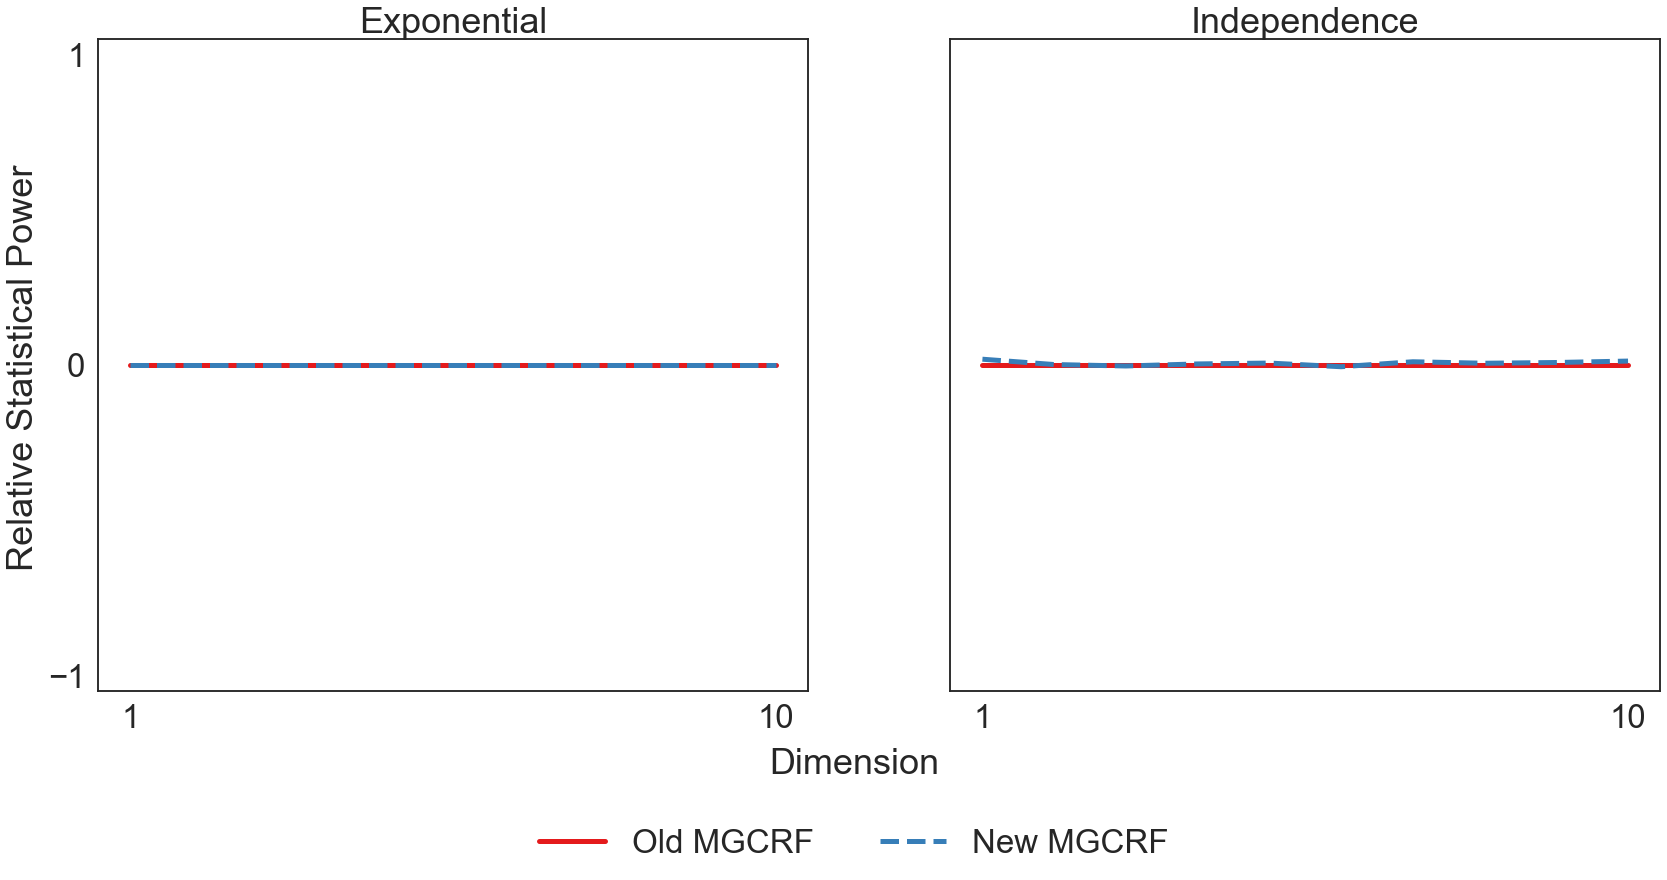

In [6]:
plot_power()

(0, 1.05)

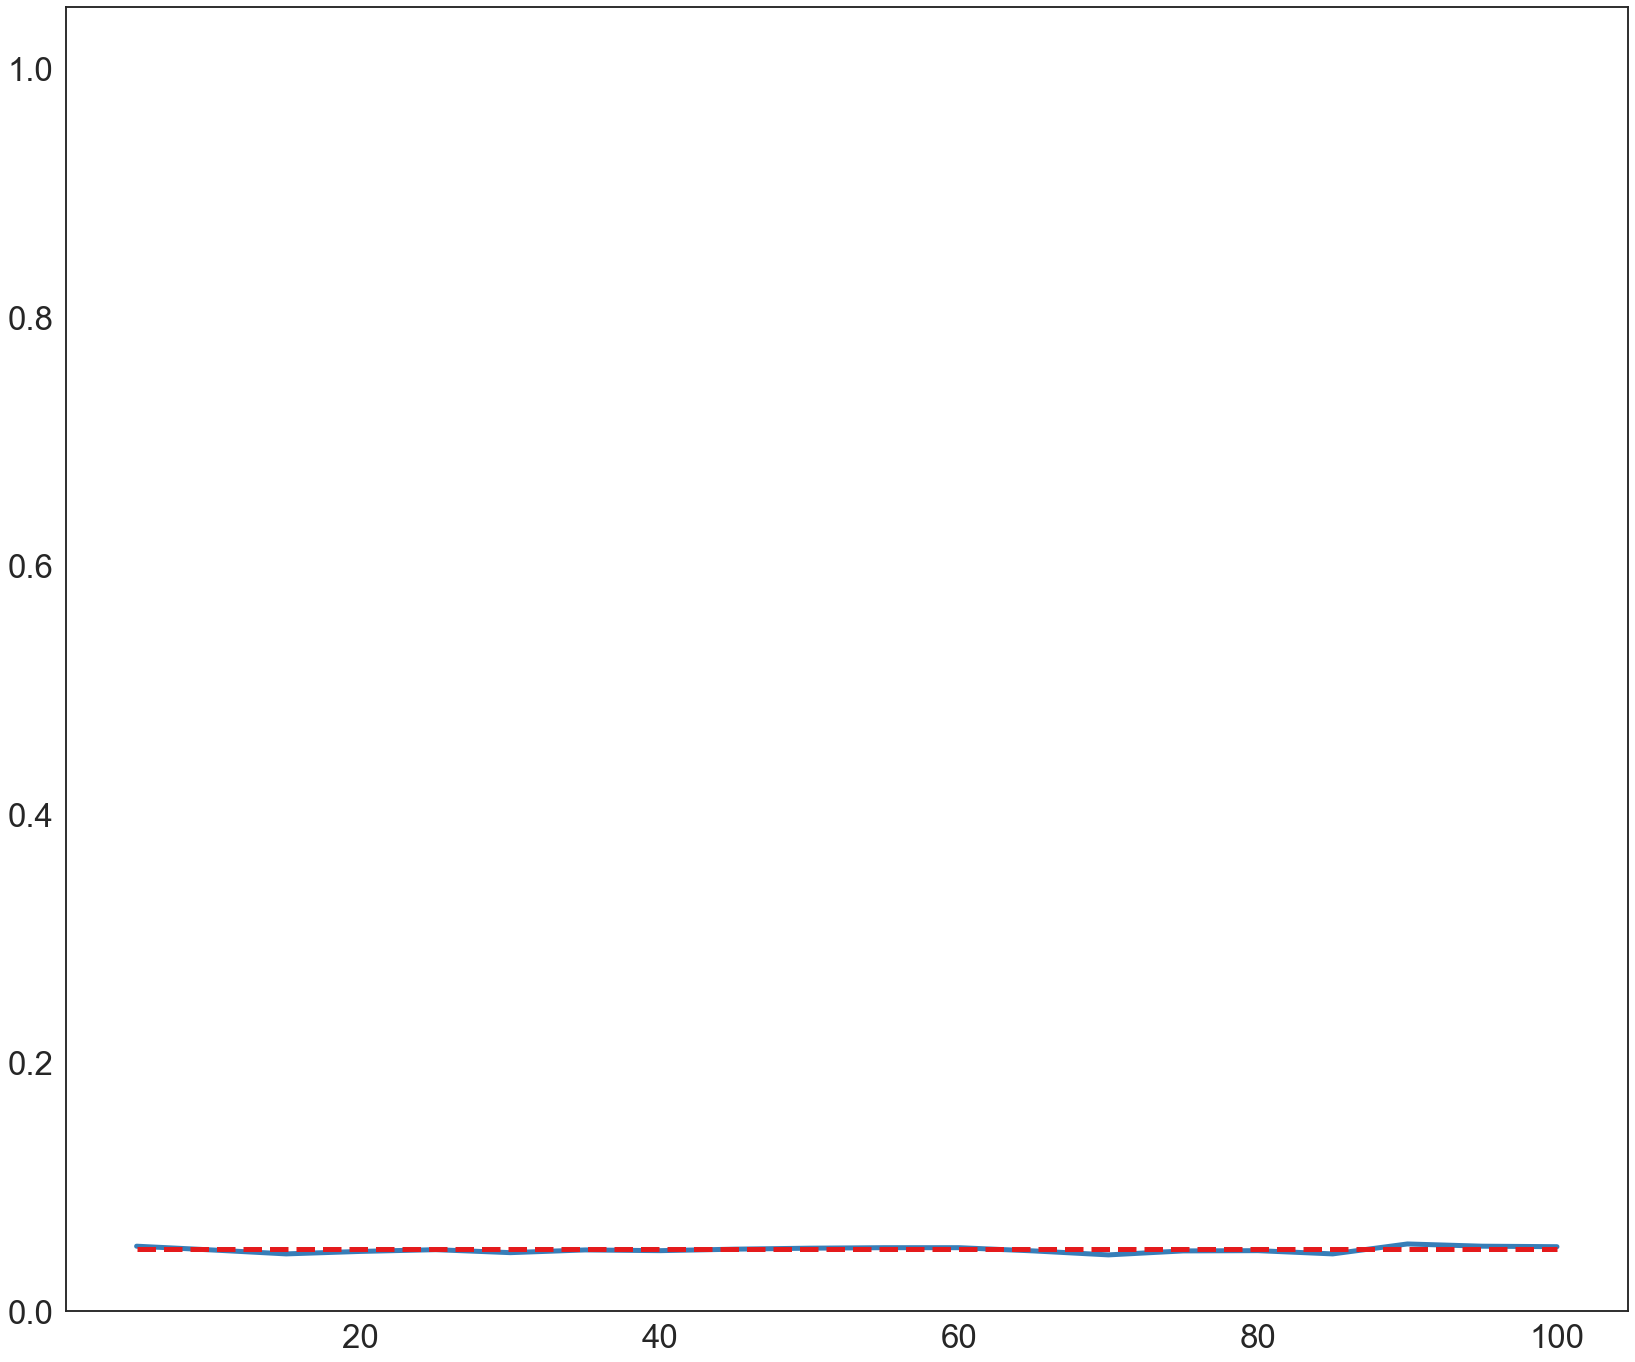

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(28,24))
MAX_SAMPLE_SIZE = 100
STEP_SIZE = 5
SAMP_SIZES = range(5, MAX_SAMPLE_SIZE + STEP_SIZE, STEP_SIZE)
power = np.genfromtxt('/Users/sampan/workspace/hyppo/benchmarks/vs_samplesize/multimodal_independence_MGCRF.csv',
                                  delimiter=',')
ax.plot(SAMP_SIZES, power, "#377eb8", label="New MGCRF", lw=5)
ax.plot(SAMP_SIZES, [0.05] * len(SAMP_SIZES), "#e41a1c", lw=5, linestyle="dashed")
ax.set_ylim(0, 1.05)

In [1]:
from hyppo.random_forest import MGCRF

In [2]:
from hyppo.sims import multimodal_independence

x, y = multimodal_independence(100, 1)

In [3]:
import numpy as np
from joblib import Parallel, delayed

def _perm_stat(calc_stat, x, y):
    permy = np.random.permutation(y)
    perm_stat = calc_stat(x, permy)

    return perm_stat


def perm_test(calc_stat, x, y, reps=1000, workers=1):
    """
    Calculate the p-value via permutation
    """
    # calculate observed test statistic
    stat = calc_stat(x, y)

    # calculate null distribution
    null_dist = np.array(
        Parallel(n_jobs=workers)(
            [delayed(_perm_stat)(calc_stat, x, y) for rep in range(reps)]
        )
    )
    pvalue = (null_dist >= stat).sum() / reps

    # correct for a p-value of 0. This is because, with bootstrapping
    # permutations, a p-value of 0 is incorrect
    if pvalue == 0:
        pvalue = 1 / reps

    return stat, pvalue, null_dist

In [4]:
import matplotlib.pyplot as plt
from joblib import Parallel, delayed

In [5]:
reps=100
def calc_pvalue(x, y):
    return perm_test(MGCRF()._statistic, x, y)[1]

null_dist = np.array(
    Parallel(n_jobs=-1, verbose=100)(
        [delayed(calc_pvalue)(x, y) for _ in range(reps)]
    )
)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
Pickling array (shape=(100, 1), dtype=float64).
Pickling array (shape=(100, 1), dtype=float64).
Pickling array (shape=(100, 1), dtype=float64).
Pickling array (shape=(100, 1), dtype=float64).
Pickling array (shape=(100, 1), dtype=float64).
Pickling array (shape=(100, 1), dtype=float64).
Pickling array (shape=(100, 1), dtype=float64).
Pickling array (shape=(100, 1), dtype=float64).
Pickling array (shape=(100, 1), dtype=float64).
Pickling array (shape=(100, 1), dtype=float64).
Pickling array (shape=(100, 1), dtype=float64).
Pickling array (shape=(100, 1), dtype=float64).
Pickling array (shape=(100, 1), dtype=float64).
Pickling array (shape=(100, 1), dtype=float64).
Pickling array (shape=(100, 1), dtype=float64).
Pickling array (shape=(100, 1), dtype=float64).
Pickling array (shape=(100, 1), dtype=float64).
Pickling array (shape=(100, 1), dtype=float64).
Pickling array (shape=(100, 1), dtype=float64).
Pickling arr

[Parallel(n_jobs=-1)]: Done  43 tasks      | elapsed: 10.2min
Pickling array (shape=(100, 1), dtype=float64).
Pickling array (shape=(100, 1), dtype=float64).
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed: 10.2min
Pickling array (shape=(100, 1), dtype=float64).
Pickling array (shape=(100, 1), dtype=float64).
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed: 10.2min
Pickling array (shape=(100, 1), dtype=float64).
Pickling array (shape=(100, 1), dtype=float64).
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 10.2min
Pickling array (shape=(100, 1), dtype=float64).
Pickling array (shape=(100, 1), dtype=float64).
[Parallel(n_jobs=-1)]: Done  47 tasks      | elapsed: 10.3min
Pickling array (shape=(100, 1), dtype=float64).
Pickling array (shape=(100, 1), dtype=float64).
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed: 10.3min
Pickling array (shape=(100, 1), dtype=float64).
Pickling array (shape=(100, 1), dtype=float64).
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed

array([0.207, 0.196, 0.206, 0.201, 0.223, 0.268, 0.231, 0.229, 0.184,
       0.238, 0.223, 0.193, 0.199, 0.233, 0.203, 0.209, 0.186, 0.239,
       0.197, 0.208, 0.227, 0.217, 0.231, 0.207, 0.248, 0.212, 0.209,
       0.231, 0.23 , 0.234, 0.22 , 0.193, 0.209, 0.216, 0.231, 0.204,
       0.229, 0.206, 0.22 , 0.226, 0.209, 0.204, 0.221, 0.201, 0.213,
       0.205, 0.222, 0.239, 0.223, 0.225, 0.226, 0.26 , 0.198, 0.197,
       0.157, 0.194, 0.225, 0.199, 0.225, 0.229, 0.265, 0.186, 0.211,
       0.2  , 0.265, 0.19 , 0.237, 0.198, 0.208, 0.213, 0.22 , 0.223,
       0.183, 0.192, 0.206, 0.213, 0.212, 0.221, 0.174, 0.188, 0.227,
       0.185, 0.254, 0.192, 0.241, 0.178, 0.217, 0.205, 0.191, 0.231,
       0.229, 0.238, 0.224, 0.194, 0.223, 0.187, 0.217, 0.238, 0.188,
       0.217])

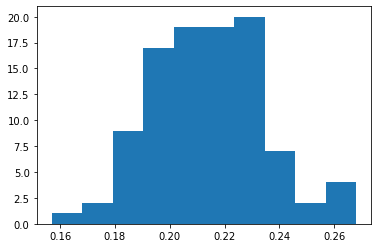

In [8]:
plt.hist(null_dist)
null_dist

In [9]:
from hyppo.sims import linear

x, y = linear(5, 1)
x, y

(array([[ 0.01235873],
        [-0.24637821],
        [-0.56322995],
        [-0.6668344 ],
        [ 0.99222161]]),
 array([[ 0.01235873],
        [-0.24637821],
        [-0.56322995],
        [-0.6668344 ],
        [ 0.99222161]]))

In [10]:
from scipy.spatial.distance import cdist

dx = cdist(x, x)
dx

array([[0.        , 0.25873695, 0.57558869, 0.67919313, 0.97986288],
       [0.25873695, 0.        , 0.31685174, 0.42045619, 1.23859983],
       [0.57558869, 0.31685174, 0.        , 0.10360445, 1.55545157],
       [0.67919313, 0.42045619, 0.10360445, 0.        , 1.65905601],
       [0.97986288, 1.23859983, 1.55545157, 1.65905601, 0.        ]])

In [11]:
import numpy as np

order = np.random.permutation(dx.shape[0])
order

array([0, 3, 4, 2, 1])

In [12]:
 
permuted

array([[0.        , 0.67919313, 0.97986288, 0.57558869, 0.25873695],
       [0.67919313, 0.        , 1.65905601, 0.10360445, 0.42045619],
       [0.97986288, 1.65905601, 0.        , 1.55545157, 1.23859983],
       [0.57558869, 0.10360445, 1.55545157, 0.        , 0.31685174],
       [0.25873695, 0.42045619, 1.23859983, 0.31685174, 0.        ]])

In [29]:
def _gen_coeffs(p):
    """Calculates coefficients polynomials"""
    return np.array([1 / (i + 1) for i in range(p)]).reshape(-1, 1)

def _random_uniform(n, p, low=-1, high=1):
    """Generate random uniform data"""
    return np.array(np.random.uniform(low, high, size=(n, p)))

def two_parabolas(n, p, noise=False, low=-1, high=1, prob=0.5):
    r"""
    Simulates univariate or multivariate two parabolas data.

    Parameters
    ----------
    n : int
        The number of samples desired by the simulation.
    p : int
        The number of dimensions desired by the simulation.
    noise : bool, (default: False)
        Whether or not to include noise in the simulation.
    low : float, (default: -1)
        The lower limit of the uniform distribution simulated from.
    high : float, (default: -1)
        The upper limit of the uniform distribution simulated from.
    prob : float, (default: 0.5)
        The probability of the bernoulli distribution simulated from.

    Returns
    -------
    x, y : ndarray
        Simulated data matrices. `x` and `y` have shapes `(n, p)` and `(n, 1)`
        where `n` is the number of samples and `p` is the number of
        dimensions.

    Notes
    -----
    Two Parabolas :math:`(X, Y) \in \mathbb{R}^p \times \mathbb{R}^p`:

    .. math::

        X &\sim \mathcal{U}(-1, 1)^p \\
        Y &= ((w^T X)^2 + 2 \kappa \epsilon) \times \left( U = \frac{1}{2} \right)

    Examples
    --------
    >>> from hyppo.sims import two_parabolas
    >>> x, y = two_parabolas(100, 2)
    >>> print(x.shape, y.shape)
    (100, 2) (100, 2)
    """
    x = _random_uniform(n, p, low, high)
    coeffs = _gen_coeffs(p)
    u = np.random.binomial(1, prob, size=(n, 1))
    rand_noise = _random_uniform(n, 1, low=0, high=1)

    x_coeffs = x @ coeffs
    y = (x_coeffs ** 2 + 2 * noise * rand_noise) * (u - 0.5)

    return x, y

In [30]:
x, y = two_parabolas(100, 2)

In [31]:
x

array([[-0.6916501 ,  0.92101475],
       [-0.12935462,  0.82383033],
       [ 0.29478917,  0.01154558],
       [-0.16932746,  0.6657475 ],
       [-0.95756341,  0.55285729],
       [-0.69012371, -0.75625792],
       [ 0.50295364, -0.44995359],
       [-0.78544715, -0.73080314],
       [ 0.21835867,  0.08563109],
       [ 0.85607648,  0.32240684],
       [-0.18340878, -0.18413897],
       [-0.50898604,  0.91895147],
       [ 0.632098  , -0.8894612 ],
       [ 0.21765643, -0.80869393],
       [-0.96847063, -0.55760238],
       [ 0.43986739, -0.13671853],
       [ 0.95419987,  0.75207848],
       [ 0.35926034,  0.34098745],
       [ 0.03564115, -0.64449975],
       [-0.04097573, -0.59473123],
       [ 0.99395   ,  0.57918967],
       [ 0.14651454, -0.6750993 ],
       [ 0.74861932, -0.24595321],
       [ 0.99383496, -0.17459524],
       [-0.01230726,  0.4030553 ],
       [ 0.89693253,  0.02817798],
       [ 0.3741944 , -0.72833984],
       [ 0.91986519, -0.38687566],
       [ 0.04123077,

In [32]:
y

array([[ 2.67134790e-02],
       [-3.99202298e-02],
       [ 4.51687453e-02],
       [ 1.33736951e-02],
       [ 2.31972287e-01],
       [-5.70581881e-01],
       [-3.86355642e-02],
       [-6.62226390e-01],
       [-3.41059842e-02],
       [ 5.17429202e-01],
       [ 3.79441372e-02],
       [ 1.22563501e-03],
       [ 1.75532713e-02],
       [ 1.74266776e-02],
       [-7.77843501e-01],
       [ 6.90091441e-02],
       [-8.84768052e-01],
       [ 1.40319686e-01],
       [ 4.10722807e-02],
       [ 5.72374324e-02],
       [ 8.23743669e-01],
       [-1.82472067e-02],
       [-1.95714405e-01],
       [-4.10904973e-01],
       [-1.79021782e-02],
       [ 4.14980099e-01],
       [-5.02450944e-05],
       [ 2.63848353e-01],
       [ 1.12210168e-03],
       [ 1.71130054e-01],
       [-2.12872571e-01],
       [ 1.03775347e-01],
       [-2.04556742e-02],
       [ 1.83746786e-01],
       [-3.03133335e-01],
       [ 3.45436305e-01],
       [-1.31197048e-01],
       [ 1.55926992e-01],
       [ 7.6